In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
!pip install -q sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import time as t
import tensorflow.compat.v2.feature_column as f

In [ ]:
pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from alpha_vantage.timeseries import TimeSeries
api ="5MNYNWCZUS1FH19B"
ts = TimeSeries(key=api,output_format = 'pandas')
CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=TSLA&interval=5min&slice=year1month2&apikey=5MNYNWCZUS1FH19B'
csvurl='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=TSLA&interval=5min&slice=year1month1&apikey=5MNYNWCZUS1FH19B'
dftrain3 = pd.read_csv(CSV_URL)
dftrain1 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=TSLA&interval=5min&slice=year1month3&apikey=5MNYNWCZUS1FH19B')
dftrain2 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=TSLA&interval=5min&slice=year1month4&apikey=5MNYNWCZUS1FH19B')
dfftrain=pd.read_csv(csvurl)
#df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=5MNYNWCZUS1FH19B')
data=ts.get_intraday('TSLA',interval='1min')

In [ ]:
df=data[0]
dftrain=pd.concat([dftrain3,dftrain1,dftrain2],ignore_index=True)
dftrain=dftrain[['time','close']]
dftrain.index=dftrain['time']
dfftrain=dfftrain[['time','close']]
dfftrain.index=dfftrain['time']
dftrain=dftrain.iloc[::-1]
dfftrain=dfftrain.iloc[::-1]
df=df.iloc[::-1]

In [ ]:
dftrain

,time,close
time,,
2022-05-31 04:05:00,2022-05-31 04:05:00,257.333333
2022-05-31 04:10:00,2022-05-31 04:10:00,257.066667
2022-05-31 04:15:00,2022-05-31 04:15:00,256.666667
2022-05-31 04:20:00,2022-05-31 04:20:00,256.733333
2022-05-31 04:25:00,2022-05-31 04:25:00,257.493333
...,...,...
2022-08-26 19:40:00,2022-08-26 19:40:00,284.420000
2022-08-26 19:45:00,2022-08-26 19:45:00,284.490000
2022-08-26 19:50:00,2022-08-26 19:50:00,284.660000


In [ ]:
df_as_np = dftrain.to_numpy()
dates = df_as_np[:, 0]
act=dftrain['close']
df_as_np1 = dfftrain.to_numpy()
dates1 = df_as_np1[:, 0]
act1=dfftrain['close']
date_train=dates
date_test=dates1
yatrain=act
yaval=act[:len(act)]
yatest=act1
tp=df['4. close']

In [ ]:
dftrain

,time,close
time,,
2022-05-31 04:05:00,2022-05-31 04:05:00,257.333333
2022-05-31 04:10:00,2022-05-31 04:10:00,257.066667
2022-05-31 04:15:00,2022-05-31 04:15:00,256.666667
2022-05-31 04:20:00,2022-05-31 04:20:00,256.733333
2022-05-31 04:25:00,2022-05-31 04:25:00,257.493333
...,...,...
2022-08-26 19:40:00,2022-08-26 19:40:00,284.420000
2022-08-26 19:45:00,2022-08-26 19:45:00,284.490000
2022-08-26 19:50:00,2022-08-26 19:50:00,284.660000


In [ ]:
"""this function takes 1 parameter , dataframe and returns 5 values  buy/sell signals with moving average and slopes of moving average and max variation of price"""
def m_avg(yt):
  ma=yt.to_numpy()
  dt=yt.index
  N=7                   # recomended N value for data set size : 1day=3,1 month=7,,3months=9,
  k=2/(N+1)
  d=0
  ema,buy,sell=[],[],[]
  s5=[]
  slope=[]
  fl=0
  min=ma[0]
  max=0
  for i in range(4):
    if(ma[i]<min):
      low=ma[i]
    if(ma[i]>max):
      max=ma[i]
    s5.append(ma[i])
    ema.append(sum(s5)*1.0/(i+1))
    sl=(s5[0]-s5[-1])/(i+1)
    slope.append(sl)

  for i in range (4,len(ma)):
    if(ma[i]<min):
      low=ma[i]
    if(ma[i]>max):
      max=ma[i]
    s5.pop(0)
    s5.append(ma[i])
    avg = (ma[i]*k)+(ema[-1]*(1-k))                             #(sum(s5)*1.0/10)+(s5[-1]*3.0/10)+(s5[-2]*3.0/10)#+(s5[-3]*1.0/12) EMA=Price(t)×k+EMA(y)×(1−k)
    ema.append(avg)                                         #t=today y=yesterday N=number of days in EMA k=2÷(N+1)
    sl=(ema[-1]-ema[-2])/2
    if(avg<=ma[i] and fl==0 and sl>0.06): # recomended sl value for 1day:sl>0.04,1month:sl>0.05 ,3months=sl>0.06
      buy.append([dt[i],ma[i]])
      fl=1
    if((avg>=ma[i] and fl==1 and avg>(buy[-1][-1]+1)) ):
      sell.append([dt[i],ma[i]])
      fl=0
      d=0
    slope.append(sl)
    if(fl==1):
      d+=1
  dif=max-min
  return ema,slope,buy,sell,dif

In [ ]:
"""function takes 2 parameters buy signals and sell signals and displays
the profit and responds to the gathered information from the signals"""
def profit(b1,s1,d1):
  if(len(b1)>0):
    if(len(s1)>0):
      tp=[]
      for i in range(len(s1)):
        p=s1[i][-1]-b1[i][-1]
        tp.append(p)
      wint=[i for i in tp if i>0]
      p1=len(wint)/len(tp)
      print("buy and sell signals recived")
      print("correctness  of trade signal set : ",p1*100," percentage")
      print("total profit earned from trade signal set is: $", sum(tp))
      print("maximum attainable profit :",d1)
      print("model profit percentage: ",(sum(tp)/d1)*100)
    else:
      print("did not recive any sell signal as higher profits is expected later on")
  else:
    print("no buy signal recived as the trend is decreasing or constant")
  return

In [ ]:
""" this function takes 4 parameters buy ,sell, dataframe and moving average
and displays a graph with buy and sell points predicted by the model """
def analyze(b,s,tp,ma):
  tsp=[]
  tss=[]
  for i in range(len(b)):
    tsp.append(str(b[i][0]))
    b[i]=b[i][1]
  for i in range(len(s)):
    tss.append(str(s[i][0]))
    s[i]=s[i][1]
  plt.figure(1,figsize=(80,12))
  plt.plot(tp)
  plt.plot(tp.index,ma)
  plt.scatter(tp.loc[tsp].index,tp.loc[tsp],marker='^',c='g',s=80)#locate buying points
  plt.scatter(tp.loc[tss].index,tp.loc[tss],marker='v',c='r',s=80)#locate selling points
  plt.legend( [' Observations','moving avg'])
  return

In [ ]:
ma1,sl1,b1,s1,d1=m_avg(yatrain) #data 3 months
ma3,sl3,b3,s3,d3=m_avg(yatest) # data 1 month
ma4,sl4,b4,s4,d4=m_avg(tp) # data 1 day

In [ ]:
yatrain


time
2022-05-26 04:15:00    262.361630
2022-05-26 04:20:00    262.201970
2022-05-26 04:25:00    262.331694
2022-05-26 04:30:00    261.742947
2022-05-26 04:35:00    261.443584
                          ...    
2022-08-23 19:00:00    276.250000
2022-08-23 19:35:00    276.050000
2022-08-23 19:50:00    276.000000
2022-08-23 19:55:00    276.000000
2022-08-23 20:00:00    276.190000
Name: close, Length: 9851, dtype: float64

In [ ]:
profit(b1,s1,d1) # data 1 month () try all the different datas to find the different profits

buy and sell signals recived
correctness  of trade signal set :  92.3076923076923  percentage
total profit earned from trade signal set is: $ 57.484499998999894
maximum attainable profit : 62.55000000000001
model profit percentage:  91.90167865547544


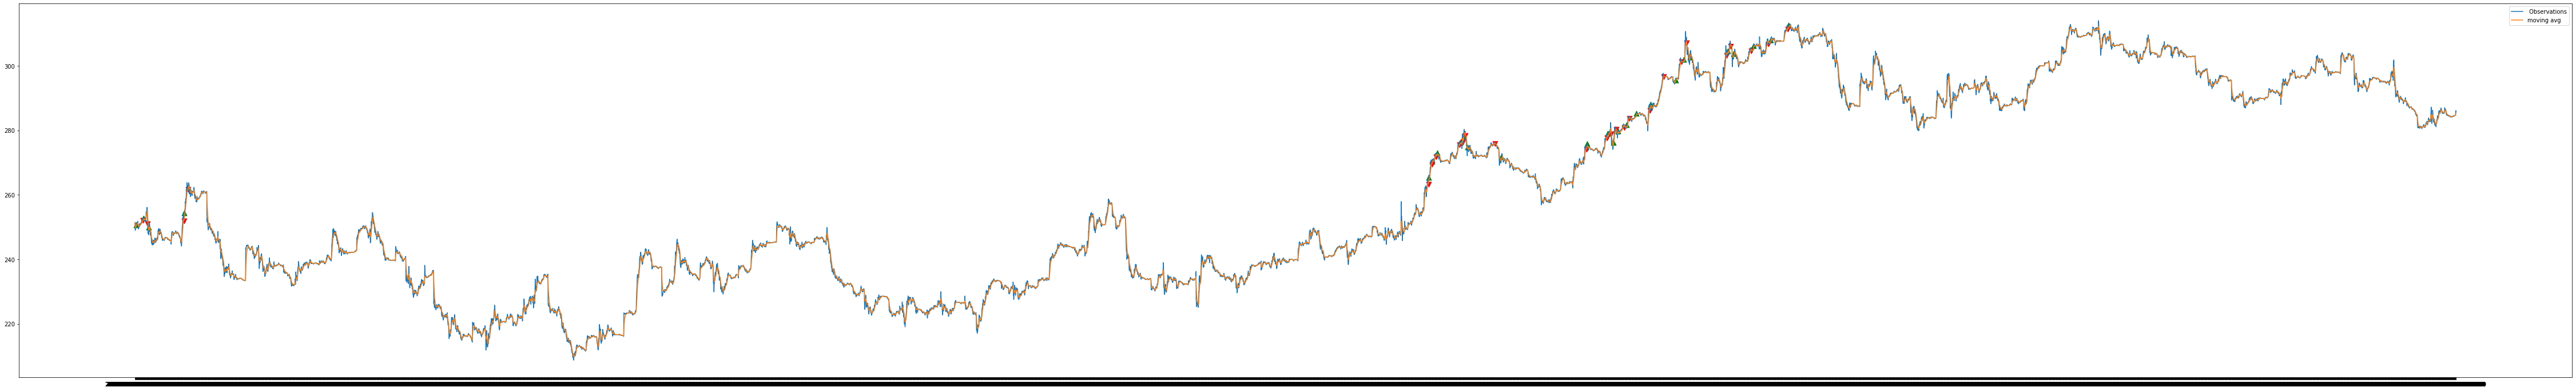

In [ ]:
analyze(b1,s1,yatrain,ma1) # data (plots a graph with buy and sell signals) click graph to expand(green =buy red =sell)

In [ ]:
pip install yahoo-fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 98.2 MB/s 
     |████████████████████████████████| 127 kB 56.8 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=edfedec124373ff1df54d7dc42f6bf4196933ab16945d05398c2243f8a9f7756
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=3de0bfa97b93fd8a997b5ac678ea8baa5f11a33a5a11b4f8e720bb3c14670727
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=a6fba7c42770c984dc7599b510b3b1f75f8d41f5c336b34f557d9

In [ ]:
pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yahoo_fin.stock_info import *

In [ ]:
print(get_live_price("AMZN"))